## 1.3 Core Operations

In [77]:
import cv2
import numpy as np

In [78]:
img = cv2.imread('mountain1.jpg')
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()

In [79]:
drawing = False # true if mouse is pressed
mode = 0 # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
cx,cy = -1,-1
font = cv2.FONT_HERSHEY_SIMPLEX

In [80]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,cx,cy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        cx,cy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cx,cy = x,y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cx,cy = x,y
def nothing(x):
    pass

In [81]:
#img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('mountain1.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value','image',0,255,nothing)
while(1):
    img = cv2.imread('mountain1.jpg')
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode+=1
        if mode > 3:
            mode=0
    elif k == 27:
        break
    # get current positions of four trackbars
    value = cv2.getTrackbarPos('value','image')    
    if ix != -1 and iy != -1:
        cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0) 
        if mode == 1:
            clip = img[iy:cy,ix:cx]
            clip[:,:,1]=0 #green
            clip[:,:,2]=0 #red
        elif mode == 2:
            clip = img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,2]=0 #red
        elif mode == 3:
            clip = img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,1]=0 #green
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+") - "+str(value)+" - "+str(mode)
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

In [82]:
def imageshow(img):
    cv2.imshow('image',img)
    k = cv2.waitKey(0)
    if k == 27: # wait for ESC key to exit
        cv2.destroyAllWindows()

In [83]:
img = cv2.imread('mountain1.jpg')

In [84]:
img.shape #height width chaanel

(768, 1366, 3)

In [85]:
img[0:200,0:100]=[0,0,255]

In [86]:
imageshow(img)

In [87]:
img = cv2.imread('mountain1.jpg')
clip = img[400:600,400:500]
clip[:,:,1]=0
clip[:,:,2]=0

In [88]:
img[100:300,100:200] = clip

In [89]:
imageshow(img)

## Making Boarders for Images (Padding)

In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [91]:
BLUE = [0,0,255]
#img1 = cv2.imread('opencv_logo.png')
img1 = cv2.imread('sunflower.jpg')

In [92]:
img1.shape

(450, 810, 3)

In [93]:
m=300 # m값을 수정하면서 테스트 해보기
replicate = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REPLICATE)

In [94]:
replicate.shape

(1050, 1410, 3)

In [95]:
reflect = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_CONSTANT,value=BLUE)

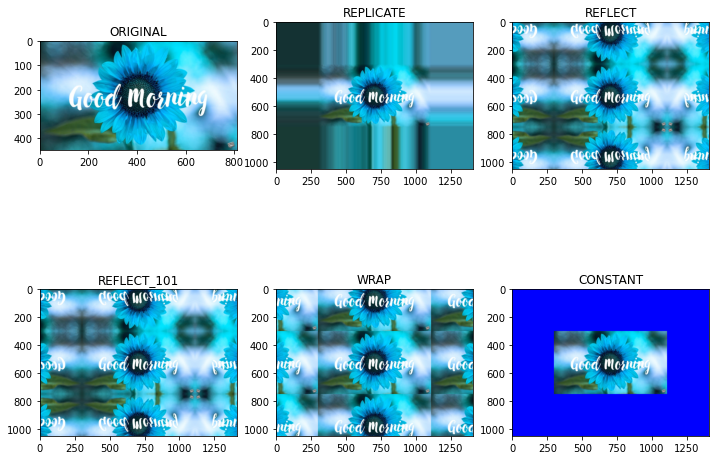

In [96]:
plt.figure(figsize=(12,9))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE') #각 모서리 값을 각자의 4방향으로 늘리는 
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT') # 각 4방향으로 거울 처럼 반사 가 되는
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101') # 각 4방향으로 한칸정도 차이나고 거울 처럼 반사가 되는
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP') # 계속 아래위로 반복
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT') # 콘스탄트 값이 들어가는 것
plt.show()

## addWeighted

In [97]:
img1 = cv2.imread('boat.jpg')
img2 = cv2.imread('upsidedown.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [98]:
def nothing(x):
    pass

In [99]:
cv2.namedWindow('image')
cv2.createTrackbar('alpha','image',0,255,nothing)
while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    alpha = cv2.getTrackbarPos('alpha','image')
    dst = cv2.addWeighted(img1,alpha/255,img2,1.-alpha/255.,0)
cv2.destroyAllWindows()    

## Measuring Performance with OpenCV

In [100]:
img1 = cv2.imread('boat.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()

In [101]:
for i in range(5,49,2):  # 5부터 47 까지 2씩 증가하는 것 
    print(i)

5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47


In [102]:
print(x[:]) # 

range(5, 49, 2)


In [103]:
e1

5638245039720

In [104]:
e2

5638250237055

In [105]:
cv2.getTickFrequency()

10000000.0

In [106]:
print(t)

0.5197335


In [107]:
imageshow(img1)

In [108]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [109]:
def nothing(x):
    pass

In [111]:
cv2.namedWindow('image')
cv2.createTrackbar('medianBlur','image',5,49,nothing)
img1 = cv2.imread('boat.jpg')
i=5
while(1):
    i = cv2.getTrackbarPos('medianBlur','image')
    i = int(i/2)*2+1;
    dst = cv2.medianBlur(img1,i)
    cv2.imshow('1mage',dst)
    k = cv2.waitKey(1) &0xFF
    if k == 27:
        break
cv2.destroyAllWindows()